In [1]:
import pandas as pd

In [4]:
data = pd.read_csv('./datasets/bodyPerformance.csv')

In [5]:
data

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [6]:
data.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


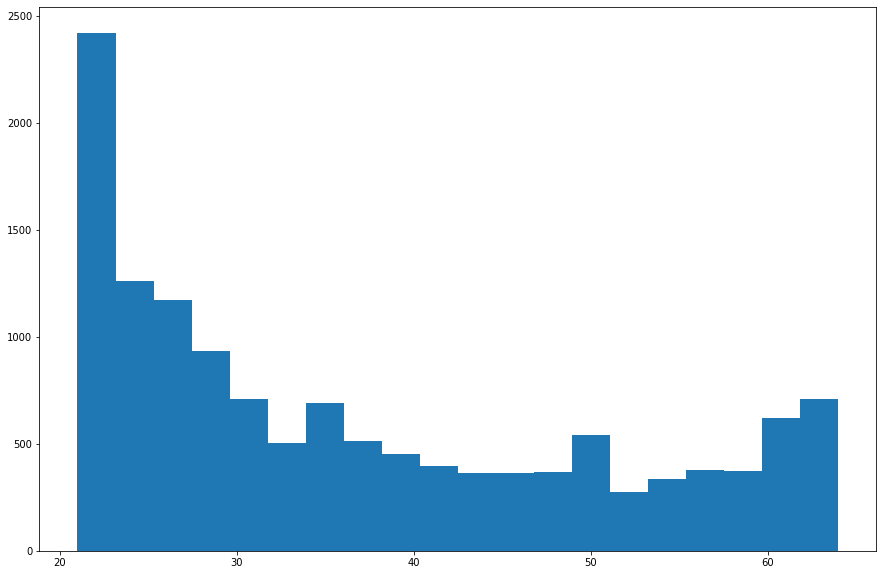

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.hist(data['age'],20)
plt.show()

In [24]:
data.groupby('gender').size()

gender
F    4926
M    8467
dtype: int64

Text(0.5, 1.0, 'males')

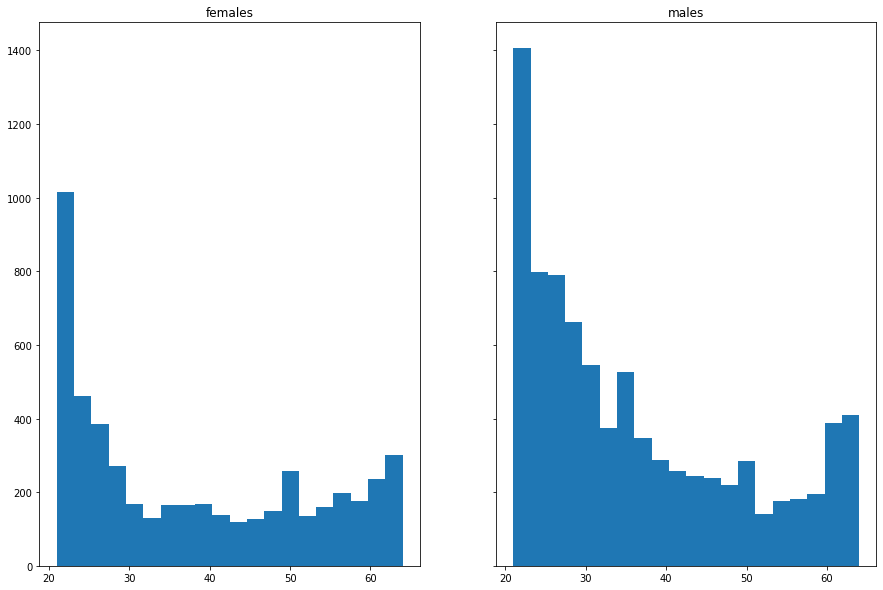

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10), sharey=True)
ax1.hist(data[data['gender']=='F']['age'],20)
ax1.set_title('females')
ax2.hist(data[data['gender']=='M']['age'], 20)
ax2.set_title('males')


In [36]:
data.groupby('class').size()

class
A    3348
B    3347
C    3349
D    3349
dtype: int64

In [40]:
class_gender_counts = data.groupby(['class', 'gender']).size().reset_index()

In [41]:
class_gender_counts

,class,gender,0
0,A,F,1484
1,A,M,1864
2,B,F,1185
3,B,M,2162
4,C,F,1112
5,C,M,2237
6,D,F,1145
7,D,M,2204


In [48]:
class_gender_counts[class_gender_counts['gender']=='F'][0]

0    1484
2    1185
4    1112
6    1145
Name: 0, dtype: int64

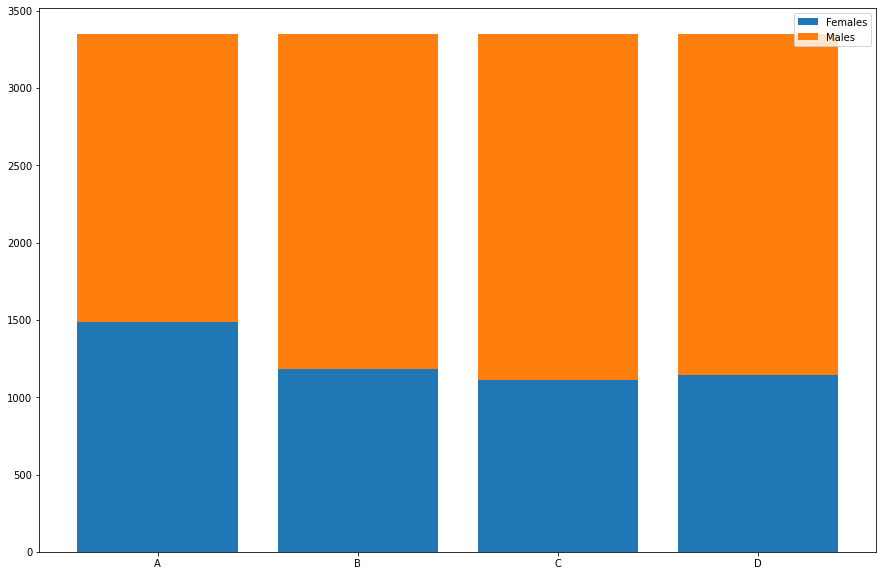

In [52]:
fig, ax = plt.subplots(figsize=(15,10))

ax.bar(class_gender_counts['class'].unique(), 
       class_gender_counts[class_gender_counts['gender']=='F'][0], 
       label='Females')
ax.bar(class_gender_counts['class'].unique(), class_gender_counts[class_gender_counts['gender']=='M'][0], 
        bottom=class_gender_counts[class_gender_counts['gender']=='F'][0],
       label='Males')

ax.legend()

plt.show()

In [54]:
data.groupby(['age', 'class']).size()

age   class
21.0  A        225
      B        230
      C        262
      D        247
22.0  A        186
              ... 
63.0  D         70
64.0  A         44
      B         51
      C         52
      D         68
Length: 176, dtype: int64

In [56]:
data[data['class']=='A']['age']

1        25.0
10       42.0
15       45.0
17       26.0
21       59.0
         ... 
13361    41.0
13363    37.0
13367    28.0
13371    54.0
13390    39.0
Name: age, Length: 3348, dtype: float64

In [67]:
data

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [70]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

data.select_dtypes(include=numerics)

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0
...,...,...,...,...,...,...,...,...,...,...
13388,25.0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0
13389,21.0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0
13390,39.0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0
13391,64.0,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0


In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.select_dtypes(include=numerics))

In [82]:
data.select_dtypes(include=numerics).columns

Index(['age', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic',
       'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm'],
      dtype='object')

In [78]:
data_scaled.shape

(13393, 10)

In [76]:
pca=PCA(0.95)

pca.fit(data_scaled)

PCA(n_components=0.95)

In [77]:
pca.n_components_

7

So, 7 principal components account for 95% of variance in data, let's see how much variance in explained by each component. 

In [79]:
pca.explained_variance_

array([4.18137059, 2.05403104, 1.2127968 , 0.78938771, 0.65124877,
       0.31882802, 0.30456765])

In [80]:
pca.explained_variance_ratio_

array([0.41810584, 0.20538777, 0.12127062, 0.07893288, 0.06512001,
       0.03188042, 0.03045449])

The absolute values and ratio are very similar (basically equal if we round to 2-3 decimal places) because the data was standardized, so the total variance of all 10 standardized features is 10.

As per Kaiser's criterion we would need to retain first three components, which account for rougly 75% of variance in data.

To select the best number of principal components we can construct the scree plot

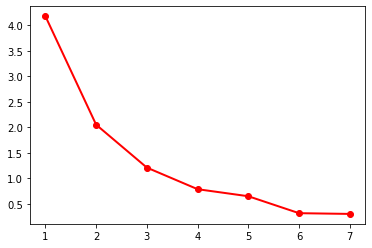

In [99]:
plt.plot(range(1,8),pca.explained_variance_, 'ro-', linewidth=2)

Let's use Kaizer criterion and explore first three principal components more closely.
First, check out the loadings of each component

In [95]:
loadings = pd.DataFrame(pca.components_.T[:,:3], columns=['pc1', 'pc2', 'pc3'], 
                                                    index=data.select_dtypes(include=numerics).columns)
loadings

,pc1,pc2,pc3
age,0.208089,-0.379252,0.046648
height_cm,-0.420726,-0.075888,-0.234754
weight_kg,-0.337152,-0.299732,-0.320006
body fat_%,0.330651,-0.239996,-0.175201
diastolic,-0.106119,-0.508806,0.398064
systolic,-0.143469,-0.521574,0.373314
gripForce,-0.432373,-0.095470,-0.057497
sit and bend forward_cm,0.045463,0.275295,0.674622
sit-ups counts,-0.378518,0.265119,0.215435
broad jump_cm,-0.438810,0.129841,0.083448


The loadings of the first principal components are quite similar in absolute values (except for features ```diastolic```, ```systolic```, ```sit and bend forward_cm``` and ```age```) so we can assume the first component suggest that dominant pattern in the data is related to physical shape (weight, height and body fat) and strength (grip force, sit ups counts and broad jump)

The largest loadings of the second principal component are the values ```age```, ```diastolic``` and ```systolic```. So, the second principal component may be interpreted as representing the age and health.

The third principal component has largest loading for ```sit and bend forward``` variable which may represent physical flexibility. 

In [100]:
data_pca = pca.transform(data_scaled)

In [101]:
data_pca.shape

(13393, 7)

In [110]:
data_pca

array([[-2.19879402,  0.46431287,  0.25810034, ...,  0.52694585,
        -0.3906182 ,  0.64470581],
       [-0.70776841,  1.54942419,  0.7498552 , ..., -1.08949549,
        -0.21376633,  0.27591249],
       [-1.90329221, -1.52972219,  0.32910101, ..., -0.34217978,
         0.19648709, -0.61295388],
       ...,
       [-2.55812975, -0.36411672, -0.37992797, ...,  1.0660859 ,
        -0.10790945,  0.3871792 ],
       [ 5.79911487, -1.19021614, -1.29371469, ...,  0.56207981,
        -0.62719863,  0.26192923],
       [-0.35801504, -0.65547523,  0.37117997, ..., -1.33814721,
        -1.0696872 , -0.17749454]])

In [119]:
import numpy as np
data_pca = np.hstack((data_pca, classes.reshape(-1, 1)))

Text(0, 0.5, 'pc2')

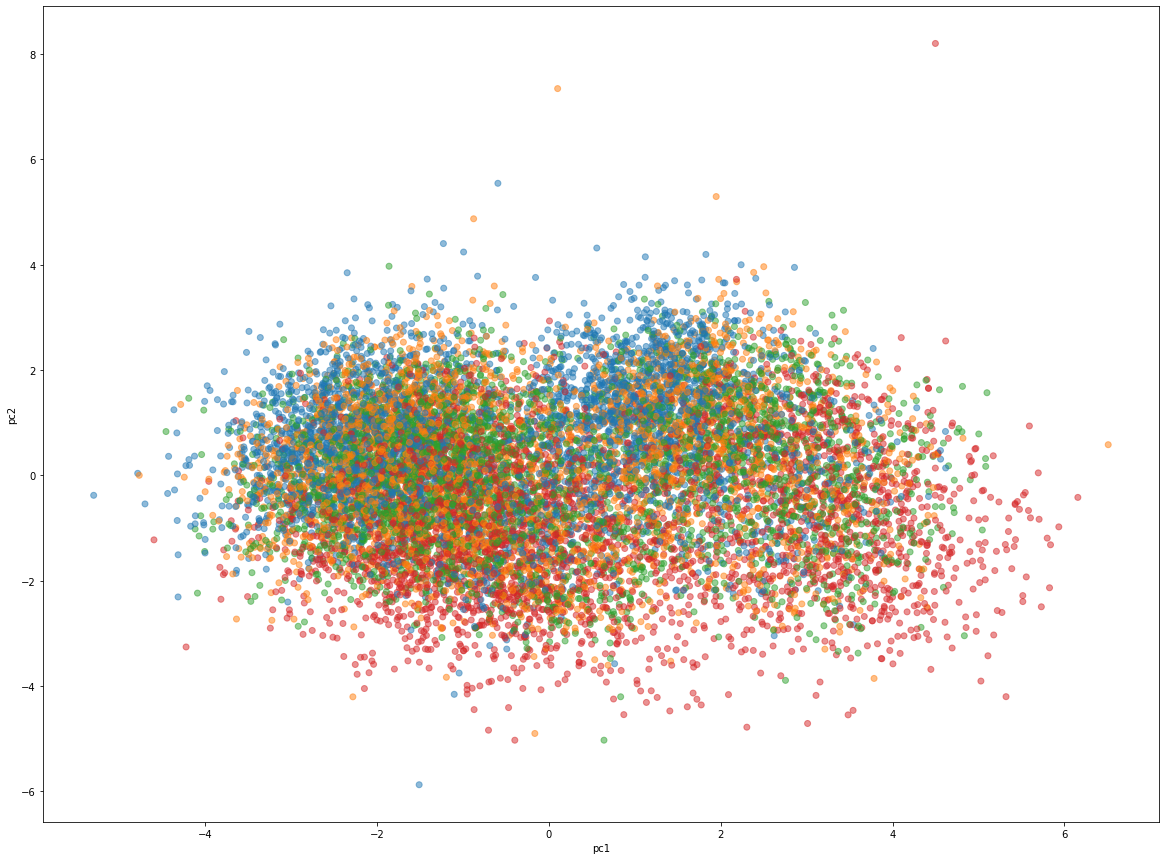

In [134]:
colors = {'A':'tab:blue', 'B':'tab:orange', 'C':'tab:green', 'D':'tab:red'}

plt.figure(figsize=(20,15))
plt.scatter(data_pca[:,0], data_pca[:,1], alpha = 0.5, c=[colors[_] for _ in data['class'].values])
plt.xlabel('pc1'),
plt.ylabel('pc2')


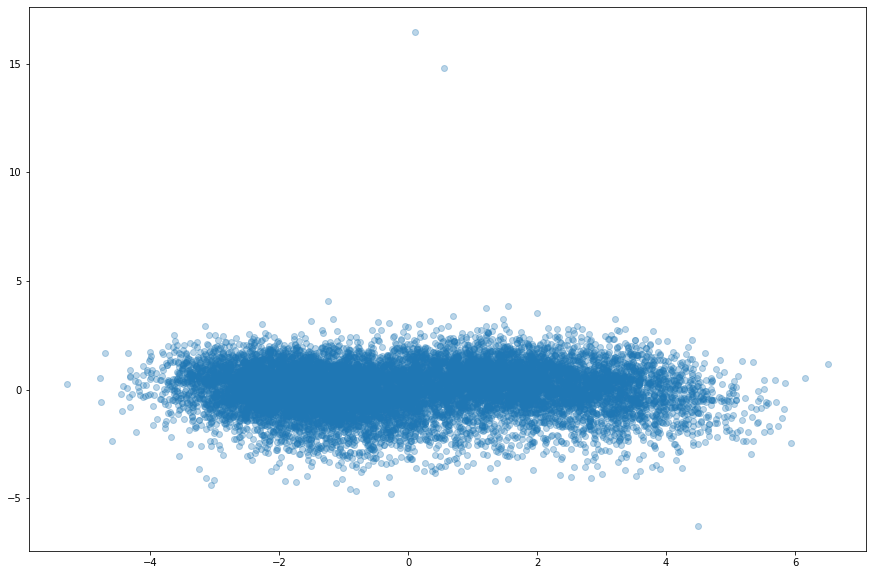

In [109]:
plt.figure(figsize=(15,10))
plt.scatter(data_pca[:,0], data_pca[:,2], alpha = 0.3)